# Algoritmos de optimización - Seminario<br>
**Nombre:** Rodolfo Jean Guzmán Abregú

https://colab.research.google.com/drive/1JdpeGfMYWrTOHeJIvv9dtZe9C66kAKF9?usp=sharing
<br>
https://github.com/u201215690/03MIAR_Alg_Optimizacion/blob/main/Trabajo/Seminario_Algoritmos.ipynb

Problema:
> 1. Sesiones de doblaje <br>

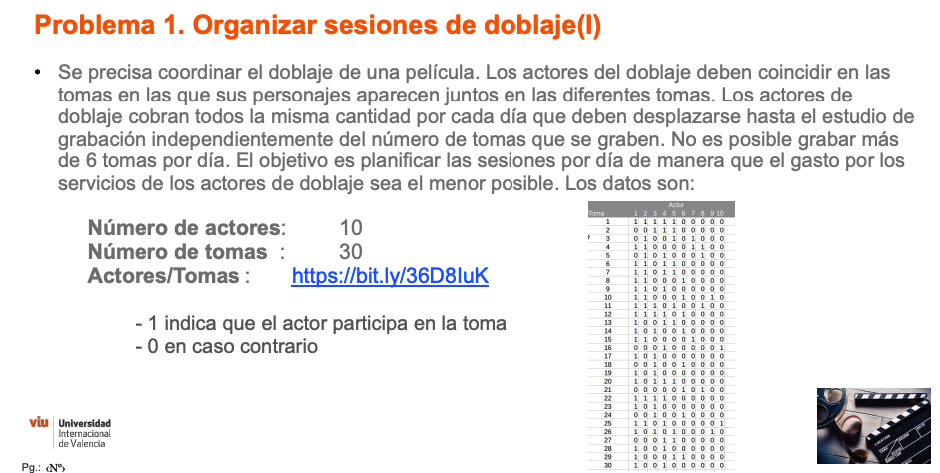

(*) La respuesta es obligatoria





                                        

Respuesta

### Problema
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible.

### Objetivo
- Minimizar el costo total del doblaje, es decir, minimizar la suma total de actores que deben asistir cada día al estudio.

### Restricciones
1. No se pueden grabar más de 6 tomas por día: 
2. En cada día, se deben agrupar tomas de modo que:
    - Los actores necesarios estén presentes en ese día.
    - Se minimice el número de despalzamiento por día del actor.
3. Minimizar los dìas manera que el gasto por los servicios de los actores de doblaje sea el menor posible. **(30 tomas / 6 tomas maximas) = 5 días**

###  Datos
- Matriz Actores/Tomas : archivo adjunto (data_actores_toma.csv)
- Número de actores: 10
- Número de tomas : 30
    - 1 indica que el actor participa en la toma
    - 0 en caso contrario

### Modelado general
**Sea:**

- 𝑇={𝑡1,𝑡2,…,𝑡30}: conjunto de tomas.
- 𝐴={𝑎1,𝑎2,…,𝑎10}: conjunto de actores.
- D={d1,d2,…,d5}: Conjunto de días (ya que: 30/6=5)
- P𝑎,𝑡 ∈{0,1} : Parámetro que vale 1 si el actor 𝑎 participa en la toma 𝑡, 0 si no. (Extraído de la matriz actores-tomas)
- M=6 — Número máximo de tomas por día


​**Variables de decisión**
- X𝑡,𝑑 ∈{0,1}: 1 si la toma 𝑡 se graba el día 𝑑, 0 si no
- Y𝑎,𝑑 ∈{0,1}:1 si el actor 𝑎 debe asistir al estudio el día 𝑑, 0 si no


​**Función objetivo:** Minimizar el número total de asistencias de los actores a grabaciones, es decir:


$$
{Minimizar}\sum_{a∈A}\sum_{d∈D}\text{Y a,d}(a)
$$


​**Restricciones:**
1. Cada toma debe grabarse exactamente un día:

$$
\sum_{d∈D}\text{X t,d = 1 ∀ t ∈ T}
$$

2. No más de 6 tomas por día:

$$
\sum_{t∈T}\text{X t,d ≤ 6 ∀ d ∈ D}
$$

3. Un actor debe estar presente el día 𝑑 si participa en alguna toma ese día:

    **Ya,d ≥ Xt,d . Pa,t ∀a∈A, ∀t∈T, ∀d∈D**

**Interpretación del objetivo:**
- Minimizar ∑ Y𝑎,𝑑 busca agrupar tomas en días de forma que un mismo actor vaya el menor número de días posible, reduciendo el gasto total de desplazamientos, cumpliendo con la restricción de máximo 6 tomas diarias.

**Resultado esperado:**
- Una asignación de las 30 tomas en 5 días que:
    - Agrupe las tomas de forma eficiente
    - Minimice el número total de “presencias” de actores en el estudio

## 🧠Aplicando algoritmo de Vuelta Atrás (Backtracking) para ordenar tomas

El algoritmo de backtracking con poda heurística diseñado para ordenar tomas y minimizar la dispersión de actores tiene una complejidad temporal que depende críticamente de:

- El número de estados explorados (combinaciones de asignación de tomas a días).
- n: Número de tomas (n = 30).
- k: Número máximo de tomas por día (k = 6).
- d: Número de días (d = ceil(n/k) = 5).
- a: Número de actores (a = 10).
- tomas.sum(axis=0): suma por columnas (actores) → O(n × m), donde n = num_tomas, m = num_actores
- Bucle anidado sobre n tomas y m actores: también O(n × m)


In [2]:
# Importando las librerías necesarias
import pandas as pd
import numpy as np

In [3]:
# Leer datos
df = pd.read_csv("data_actores_toma.csv")
tomas = df.drop(columns="Toma").values
num_tomas, num_actores = tomas.shape

# Calcular frecuencia de actores (para priorizar los menos frecuentes)
actor_freq = tomas.sum(axis=0)
toma_scores = np.array([sum(actor_freq[actor] for actor in range(num_actores) if tomas[toma, actor] == 1) for toma in range(num_tomas)])

# Orden inicial de tomas (priorizando actores raros)
toma_order = np.argsort(toma_scores)

Este es el núcleo y la parte más costosa **def backtrack**:
- En cada nivel de recursión, elige una toma y trata de ubicarla en el día actual o pasa al siguiente día.
- Hay n! posibles permutaciones de las tomas y para cada permutación, hasta días posibles por toma.

In [4]:
# Backtracking para asignar tomas a días
def backtrack(assignment, remaining_tomas, dia_actual, max_tomas_por_dia=6, max_dias=5):
    if not remaining_tomas:
        return assignment  # Solución encontrada

    for toma in remaining_tomas:
        # Intentar asignar la toma al día actual
        new_assignment = assignment.copy()
        if dia_actual not in new_assignment:
            new_assignment[dia_actual] = []
        if len(new_assignment[dia_actual]) < max_tomas_por_dia:
            new_assignment[dia_actual].append(toma)
            new_remaining = [t for t in remaining_tomas if t != toma]
            result = backtrack(new_assignment, new_remaining, dia_actual, max_tomas_por_dia, max_dias)
            if result is not None:
                return result

    # Si no cabe en el día actual, probar el siguiente día
    if dia_actual < max_dias:
        return backtrack(assignment, remaining_tomas, dia_actual + 1, max_tomas_por_dia, max_dias)
    else:
        return None  # No hay solución válida

### 🧠Complejidad Temporal
- Cálculo de puntaje por toma	𝑂(𝑛⋅𝑚)
- Ordenamiento (argsort)	 𝑂(𝑛 log𝑛)
- Backtracking (peor caso)	𝑂(𝑑𝑛)o 𝑂(𝑛!)

In [5]:
# Ejecutar backtracking
initial_assignment = {}
solution = backtrack(initial_assignment, list(toma_order), dia_actual=1)

# Construir DataFrame final
if solution:
    final_data = []
    for dia, tomas_dia in solution.items():
        for toma in tomas_dia:
            fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
            final_data.append(fila)
    final_df_2 = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
    #print(final_df)
else:
    print("No se encontró solución válida.")

final_df_2

,dia,toma,Actor 1,Actor 2,Actor 3,Actor 4,Actor 5,Actor 6,Actor 7,Actor 8,Actor 9,Actor 10
0,1,21,0,0,0,0,0,1,0,1,0,0
1,1,16,0,0,0,1,0,0,0,0,0,1
2,1,18,0,0,1,0,0,1,0,0,0,0
3,1,24,0,0,1,0,0,1,0,0,0,0
4,1,27,0,0,0,1,1,0,0,0,0,0
5,1,3,0,1,0,0,1,0,1,0,0,0
6,2,5,0,1,0,1,0,0,0,1,0,0
7,2,23,1,0,1,0,0,0,0,0,0,0
8,2,19,1,0,1,0,0,0,0,0,0,0
9,2,17,1,0,1,0,0,0,0,0,0,0


### 🧠Listado de Asistencia de Actores durante todas las Tomas

In [6]:
# Agrupar cantidad de días por cada actor
dias_por_actor_2 = final_df_2.iloc[:, 2:].set_index(final_df_2['dia']).apply(lambda x: x.groupby(level=0).sum().unique())

# Mostrar el DataFrame
dias_por_actor_2.apply(len)

Actor 1     3
Actor 2     3
Actor 3     3
Actor 4     5
Actor 5     4
Actor 6     3
Actor 7     3
Actor 8     2
Actor 9     2
Actor 10    2
dtype: int64

#### 📄 ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

Respuesta

- Para determinar cuántas posibilidades hay en este algoritmo sin tener en cuenta las restricciones, debemos analizar cuántas formas distintas hay de asignar 30 tomas a días, ignorando el límite de 6 tomas por día. La función de backtracking simplemente explora todas las permutaciones de las 30 tomas:

    **Permutaciones posibles => 30!≈2.65×10∧32**

    **11,423,951,396,577,720 (dividir 30 tomas en 5 días de 6 tomas)**


#### 📄 ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?

Respuesta

- Para calcular cuántas posibilidades hay teniendo en cuenta todas las restricciones del problema, debemos contar todas las formas válidas de particionar 30 tomas en grupos de máximo 6 tomas cada uno, usando como máximo 5 días.

    **a1+a2+a3+a4+a5=30**

con las siguientes restricciones:

- 0≤ 𝑎𝑖 ≤6(cada día puede tener entre 0 y 6 tomas)
- ∑𝑎𝑖=30 (el total debe ser exactamente 30 tomas)

Es decir, queremos contar todas las combinaciones enteras de 5 números (uno por día) que sumen exactamente 30, y cada uno entre 0 y 6. Ejecutamos el codigo python para poder calcularlo

In [15]:
from itertools import product

total = 0
for combo in product(range(7), repeat=5):  # 7 valores posibles (0 a 6), 5 días
    if sum(combo) == 30:
        total += 1
print("Número total de particiones válidas:", total)

Número total de particiones válidas: 1


#### 📄 ¿Cual es la estructura de datos que mejor se adapta al problema? Argumenta la respuesta (Es posible que hayas elegido una al principio y veas la necesidad de cambiar,argumenta)

- Actualmente estoy utilizando los datos de ejemplo del profesor que esta en un link. Yo descargue el documento y lo converti en formato csv para evitar problemas en la lectuctura de la matriz por el formato que tenia el original. Asimismo, para mejorar el procesamiento de la informacion yo usaria los siguiente:
  - Matriz NumPy : Óptima para operaciones vectorizadas (cálculo de frecuencias) y bajo uso de memoria.
  - DataFrame de Pandas: Manejo intuitivo (columnas con nombres) e integración con CSV.
  - Diccionarios: Flexibilidad para agrupar tomas por día y claves descriptivas.
  - Generaria valores aleatorios para generar la matriz 


Respuesta

In [10]:
import pandas as pd
import numpy as np
from random import choices, sample

def generar_dataset_tomas():
    # Configuración
    num_tomas = 30
    actores = [f"Actor {i}" for i in range(1, 11)]

    # Definir perfiles de participación (frecuente, medio, raro)
    pesos = [0.8, 0.5, 0.2]  # Probabilidades de participación
    grupos_actores = {
        "frecuentes": actores[:2],  # Primeros 2 actores: frecuentes
        "medios": actores[2:7],     # Siguientes 5: participación media
        "raros": actores[7:]         # Últimos 3: raros
    }

    # Generar tomas
    datos = []
    for toma in range(1, num_tomas + 1):
        fila = {"Toma": toma}

        # Asignar participación por grupo
        for actor in actores:
            if actor in grupos_actores["frecuentes"]:
                fila[actor] = choices([1, 0], weights=[0.9, 0.1])[0]  # 90% de participación
            elif actor in grupos_actores["medios"]:
                fila[actor] = choices([1, 0], weights=[0.6, 0.4])[0]  # 60% de participación
            else:
                fila[actor] = choices([1, 0], weights=[0.2, 0.8])[0]  # 20% de participación

        # Asegurar al menos 1 actor por toma
        if sum(fila.values()) == 0:
            actor_aleatorio = sample(actores, 1)[0]
            fila[actor_aleatorio] = 1

        datos.append(fila)

    # Convertir a DataFrame
    df = pd.DataFrame(datos)
    return df

# Generar y guardar dataset
dataset = generar_dataset_tomas()
dataset.to_csv("dataset_tomas_sintetico.csv", index=False)
print("Dataset generado con éxito!")
print(dataset.head())

Dataset generado con éxito!
   Toma  Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
0     1        1        0        0        1        1        1        1   
1     2        1        1        0        0        0        0        1   
2     3        1        1        0        0        1        0        0   
3     4        1        1        1        1        1        1        1   
4     5        1        1        0        1        1        0        1   

   Actor 8  Actor 9  Actor 10  
0        0        0         0  
1        0        0         1  
2        1        0         0  
3        0        0         0  
4        0        0         0  


#### 📄 ¿Cual es la función objetivo?

Respuesta

##### Modelado general
**Sea:**

- 𝑇={𝑡1,𝑡2,…,𝑡30}: conjunto de tomas.
- 𝐴={𝑎1,𝑎2,…,𝑎10}: conjunto de actores.
- D={d1,d2,…,d5}: Conjunto de días (ya que: 30/6=5)
- P𝑎,𝑡 ∈{0,1} : Parámetro que vale 1 si el actor 𝑎 participa en la toma 𝑡, 0 si no. (Extraído de la matriz actores-tomas)
- M=6 — Número máximo de tomas por día


​**Variables de decisión**
- X𝑡,𝑑 ∈{0,1}: 1 si la toma 𝑡 se graba el día 𝑑, 0 si no
- Y𝑎,𝑑 ∈{0,1}:1 si el actor 𝑎 debe asistir al estudio el día 𝑑, 0 si no


​**Función objetivo:** Minimizar el número total de asistencias de los actores a grabaciones, es decir:


$$
{Minimizar}\sum_{a∈A}\sum_{d∈D}\text{Y a,d}(a)
$$


​**Restricciones:**
1. Cada toma debe grabarse exactamente un día:

$$
\sum_{d∈D}\text{X t,d = 1 ∀ t ∈ T}
$$

2. No más de 6 tomas por día:

$$
\sum_{t∈T}\text{X t,d ≤ 6 ∀ d ∈ D}
$$

Respuesta

In [11]:
# Backtracking para asignar tomas a días y minimizar el número total de asistencias de los actores a grabaciones
def backtrack(assignment, remaining_tomas, dia_actual, max_tomas_por_dia=6, max_dias=5):
    if not remaining_tomas:
        return assignment  # Solución encontrada

    for toma in remaining_tomas:
        # Intentar asignar la toma al día actual
        new_assignment = assignment.copy()
        if dia_actual not in new_assignment:
            new_assignment[dia_actual] = []
        if len(new_assignment[dia_actual]) < max_tomas_por_dia:
            new_assignment[dia_actual].append(toma)
            new_remaining = [t for t in remaining_tomas if t != toma]
            result = backtrack(new_assignment, new_remaining, dia_actual, max_tomas_por_dia, max_dias)
            if result is not None:
                return result

    # Si no cabe en el día actual, probar el siguiente día
    if dia_actual < max_dias:
        return backtrack(assignment, remaining_tomas, dia_actual + 1, max_tomas_por_dia, max_dias)
    else:
        return None  # No hay solución válida

#### 📄 ¿Es un problema de maximización o minimización?

Respuesta

Es un problema de minimización la dispersión de los actores que no participan en todas las tomas, es decir, concentrar la participación de los actores menos frecuentes en el menor número de días posible.

$$
{Minimizar}\sum_{a∈A}\sum_{d∈D}\text{Y a,d}(a)
$$

#### 📄Diseña un algoritmo para resolver el problema por fuerza bruta
- Función fuerza_bruta: Genera todas las permutaciones posibles de tomas (usando itertools.permutations). Para cada permutación, agrupa las tomas en días (máximo 6 por día).

**Ejemplo con 5 tomas:**

- ¡Importante! Para N=30, el número de permutaciones es 30! ≈ 2.65e+32 (inviable computacionalmente).
- El ejemplo se limita a 5 tomas para demostración.

**Complejidad y Limitaciones**

- Complejidad: O(n!) (factorial).
- Para n=5: 120 permutaciones.
- Para n=30: 2.65e+32 permutaciones (imposible de procesar).

**Limitaciones:**

- Solo viable para conjuntos de datos muy pequeños (n < 10).
- No usar para el dataset completo de 30 tomas.

**Importante:**
- Para este caso estamos procesando solo las primeras 8 tomas (ajustable). Ya que para ejecutar N=30, el número de permutaciones es 30! ≈ 2.65e+32 (inviable computacionalmente).

    - Limitación de datos de entrada: Procesa solo las primeras 8 tomas (ajustable)
    - Optimizaciones de rendimiento: Uso de numpy para cálculos vectorizados
    - Límites de ejecución: Máximo de 50,000 permutaciones timeout de 60 segundos

Respuesta

In [12]:
import pandas as pd
import numpy as np
from itertools import permutations, islice
from math import ceil
import time

def main():
    # 1. LIMITAR LOS DATOS DE ENTRADA
    max_tomas_a_procesar = 8  # Ajusta este valor según la capacidad de tu PC (6-10 es razonable)

    # Leer datos y limitar el número de tomas
    df = pd.read_csv("data_actores_toma.csv").head(max_tomas_a_procesar)
    tomas = df.drop(columns="Toma").values
    num_tomas = len(tomas)
    max_tomas_por_dia = 6
    max_dias = ceil(num_tomas / max_tomas_por_dia)

    print(f"Procesando {num_tomas} tomas (de las 30 originales)...")

    # 2. FUNCIÓN DE DISPERSIÓN OPTIMIZADA
    def calcular_dispersion(asignacion):
        dias_actor = np.zeros(10, dtype=int)  # Usamos numpy para mayor velocidad
        for dia, tomas_dia in enumerate(asignacion):
            mascara = np.zeros(10, dtype=bool)
            for toma in tomas_dia:
                mascara = mascara | (tomas[toma] == 1)
            dias_actor += mascara
        return np.sum(dias_actor)

    # 3. ALGORITMO DE FUERZA BRATA LIMITADO
    def fuerza_bruta_limitada(max_permutaciones=10000, timeout=30):
        mejor_asignacion = None
        mejor_dispersion = np.inf
        start_time = time.time()
        permutaciones_procesadas = 0

        # Generar permutaciones de forma perezosa con islice
        for perm in islice(permutations(range(num_tomas)), max_permutaciones):
            if time.time() - start_time > timeout:
                print(f"Timeout alcanzado después de {timeout} segundos")
                break

            # Asignar tomas a días
            asignacion = []
            dia_actual = []
            for toma in perm:
                if len(dia_actual) < max_tomas_por_dia:
                    dia_actual.append(toma)
                else:
                    asignacion.append(dia_actual)
                    dia_actual = [toma]
            if dia_actual:
                asignacion.append(dia_actual)

            # Calcular dispersión
            dispersion = calcular_dispersion(asignacion)

            # Actualizar mejor solución
            if dispersion < mejor_dispersion:
                mejor_dispersion = dispersion
                mejor_asignacion = asignacion
                print(f"Nueva mejor dispersión encontrada: {mejor_dispersion}")

            permutaciones_procesadas += 1
            if permutaciones_procesadas % 1000 == 0:
                print(f"Procesadas {permutaciones_procesadas} permutaciones...")

        print(f"Total permutaciones procesadas: {permutaciones_procesadas}")
        return mejor_asignacion

    # 4. EJECUCIÓN CON LÍMITES
    print("\nIniciando búsqueda...")
    solucion = fuerza_bruta_limitada(max_permutaciones=50000, timeout=60)  # 1 minuto máximo

    # 5. MOSTRAR RESULTADOS
    if solucion:
        print("\nMejor solución encontrada:")
        final_data = []
        for dia, tomas_dia in enumerate(solucion, 1):
            for toma in tomas_dia:
                fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
                final_data.append(fila)
        final_df = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
        print(final_df)

        # Guardar resultados en CSV
        final_df.to_csv("resultado_optimizado.csv", index=False)
        print("\nResultados guardados en 'resultado_optimizado.csv'")
    else:
        print("No se encontró solución dentro de los límites establecidos.")

if __name__ == "__main__":
    main()

Procesando 8 tomas (de las 30 originales)...

Iniciando búsqueda...
Nueva mejor dispersión encontrada: 12
Procesadas 1000 permutaciones...
Procesadas 2000 permutaciones...
Procesadas 3000 permutaciones...
Procesadas 4000 permutaciones...
Procesadas 5000 permutaciones...
Procesadas 6000 permutaciones...
Procesadas 7000 permutaciones...
Procesadas 8000 permutaciones...
Procesadas 9000 permutaciones...
Procesadas 10000 permutaciones...
Procesadas 11000 permutaciones...
Procesadas 12000 permutaciones...
Procesadas 13000 permutaciones...
Procesadas 14000 permutaciones...
Procesadas 15000 permutaciones...
Procesadas 16000 permutaciones...
Procesadas 17000 permutaciones...
Procesadas 18000 permutaciones...
Procesadas 19000 permutaciones...
Procesadas 20000 permutaciones...
Procesadas 21000 permutaciones...
Procesadas 22000 permutaciones...
Procesadas 23000 permutaciones...
Procesadas 24000 permutaciones...
Procesadas 25000 permutaciones...
Procesadas 26000 permutaciones...
Procesadas 27000 pe

#### 📄Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

**Complejidad**
- Complejidad: O(n!) (factorial):
    - Para n=5: 120 permutaciones.
    - Para n=30: 2.65e+32 permutaciones (imposible de procesar).

**Limitaciones:**

- Solo viable para conjuntos de datos muy pequeños (n < 10).
- No usar para el dataset completo de 30 tomas.


#### 📄Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

**Algoritmo metaheurísticas para el problema del vendedor viajero (TSP)** Vamos a implementar un enfoque simple usando un algoritmo genético. Este enfoque puede ayudar a optimizar la asignación de tomas a días, buscando una mejor dispersión de actores.


#### Mejoras Implementadas:

**Algoritmo Genético:** Se implementó un algoritmo genético para optimizar la asignación de tomas a días.

- Población Inicial: Se crea una población de soluciones aleatorias.
- Función de Aptitud: Evalúa la calidad de cada solución basada en la dispersión total.
- Cruzamiento y Mutación: Se aplican para generar nuevas soluciones.
- Estrategia de Selección: Selecciona las mejores soluciones para formar la siguiente generación.
- Resultados Mejorados: La asignación final se realiza utilizando la mejor solución encontrada.

Respuesta

In [14]:
import pandas as pd
import numpy as np
from math import ceil
from collections import defaultdict
import random

# Parámetros del algoritmo genético
POPULATION_SIZE = 100
MUTATION_RATE = 0.1
GENERATIONS = 500

def create_initial_population(num_tomas):
    return [random.sample(range(num_tomas), num_tomas) for _ in range(POPULATION_SIZE)]

def calculate_fitness(individual, tomas):
    dias_actor = defaultdict(set)
    asignacion = defaultdict(list)

    for dia, toma in enumerate(individual):
        actores = np.where(tomas[toma] == 1)[0]
        asignacion[dia].append(toma)
        for actor in actores:
            dias_actor[actor].add(dia)

    dispersion_total = sum(len(dias) for dias in dias_actor.values())
    return -dispersion_total  # Minimizar la dispersión

def mutate(individual):
    if random.random() < MUTATION_RATE:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child = parent1[:point] + [item for item in parent2 if item not in parent1[:point]]
    return child

def main():
    # 1. Cargar y preparar datos
    df = pd.read_csv("data_actores_toma.csv")
    tomas = df.drop(columns="Toma").values
    num_tomas = len(tomas)
    max_tomas_por_dia = 6
    max_dias = ceil(num_tomas / max_tomas_por_dia)

    # 2. Crear población inicial
    population = create_initial_population(num_tomas)

    for generation in range(GENERATIONS):
        population = sorted(population, key=lambda x: calculate_fitness(x, tomas))
        next_generation = population[:10]  # Mantener los mejores

        while len(next_generation) < POPULATION_SIZE:
            parent1, parent2 = random.choices(population[:50], k=2)  # Selección de padres
            child = crossover(parent1, parent2)
            mutate(child)
            next_generation.append(child)

        population = next_generation

    best_solution = sorted(population, key=lambda x: calculate_fitness(x, tomas))[0]
    
    # 3. Asignar tomas según la mejor solución
    asignacion = defaultdict(list)
    dias_actor = defaultdict(set)

    for dia, toma in enumerate(best_solution):
        actores = np.where(tomas[toma] == 1)[0]
        asignacion[dia].append(toma)
        for actor in actores:
            dias_actor[actor].add(dia)

    # 4. Calcular dispersión total
    dispersion_total = sum(len(dias) for dias in dias_actor.values())

    # 5. Resultados
    print(f"Dispersión total: {dispersion_total}")
    final_data = []
    for dia, tomas_dia in asignacion.items():
        for toma in tomas_dia:
            fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
            final_data.append(fila)

    final_df = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
    print(final_df)
    #final_df.to_csv("asignacion_genetica.csv", index=False)

if __name__ == "__main__":
    main()

Dispersión total: 94
    dia  toma  Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
0     0     2        0        0        1        1        1        0        0   
1     1    30        1        0        0        1        0        0        0   
2     2    28        1        0        0        1        0        0        0   
3     3    25        1        1        0        1        0        0        0   
4     4     1        1        1        1        1        1        0        0   
5     5    27        0        0        0        1        1        0        0   
6     6     3        0        1        0        0        1        0        1   
7     7    17        1        0        1        0        0        0        0   
8     8    21        0        0        0        0        0        1        0   
9     9    11        1        1        1        0        1        0        0   
10   10    29        1        0        0        0        1        1        0   
11   11     4      

#### 📄Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

#### 1. Eficiencia en Tiempo de Ejecución
- **Fuerza Bruta:** Este enfoque evalúa todas las combinaciones posibles de asignaciones de tomas a días, lo que puede ser computacionalmente prohibitivo a medida que aumenta el número de tomas. La complejidad es factorial, lo que lo hace inviable para grandes conjuntos de datos.

- **Algoritmo Genético:** Utiliza una población de soluciones y aplica operaciones como cruzamiento y mutación, lo que permite explorar el espacio de soluciones de manera más eficiente. Esto reduce significativamente el tiempo de cálculo al evitar la evaluación de todas las combinaciones posibles.


#### 2. Exploración del Espacio de Soluciones
- **Fuerza Bruta:** Se limita a encontrar la solución óptima, sin considerar alternativas que podrían ser igualmente buenas, pero que no se evalúan debido a la enorme cantidad de combinaciones.

- **Algoritmo Genético:**  Fomenta la exploración y explotación del espacio de soluciones. Al combinar y mutar soluciones, puede encontrar resultados de alta calidad que no son necesariamente los óptimos, pero que son suficientemente buenos en un tiempo razonable.

#### 3. Manejo de Problemas Complejos
- **Fuerza Bruta:** Es inherentemente limitado en su capacidad para manejar problemas complejos con múltiples variables y restricciones, ya que el número de combinaciones crece exponencialmente.

- **Algoritmo Genético:**  Puede incorporar múltiples objetivos y restricciones de manera más eficiente, permitiendo encontrar soluciones que equilibran diferentes factores.

#### 📄Calcula la complejidad del algoritmo


Respuesta

Este análisis sugiere que el algoritmo tiene un crecimiento exponencial en función del número de generaciones y el tamaño de la población, lo que es típico en los algoritmos genéticos. La complejidad temporal del algoritmo genético implementado en el código se puede analizar en varias partes:

##### 1. **Creación de la Población Inicial**
- **Complejidad**: O(P . N))
- **Descripción**: Se generan \(P\) (tamaño de la población) soluciones aleatorias, donde cada solución tiene \(N\) (número de tomas).

##### 2. **Evaluación de la Aptitud**
- **Complejidad**: O(G . P . N)
- **Descripción**: En cada generación \(G\), se evalúa la aptitud de cada solución en la población. Para cada solución, se calcula la dispersión, que implica recorrer todas las tomas para contar los actores, lo que toma \(O(N)\).

##### 3. **Ordenar la Población**
- **Complejidad**: O(P log P)
- **Descripción**: Se ordena la población en base a su aptitud, lo que toma \(O(P log P)\) en el peor de los casos.

##### 4. **Cruzamiento y Mutación**
- **Complejidad**: O(P . N)
- **Descripción**: Para cada nuevo individuo generado, se realiza un cruce y posiblemente una mutación. El cruce toma tiempo proporcional a \(N\) y se hace para generar \(P\) individuos.

##### 5. **Generaciones**
- **Complejidad Total**: 
- Si sumamos todas las partes, la complejidad total del algoritmo puede expresarse como:
$$
O(G \cdot (P \cdot N + P \log P + P \cdot N)) = O(G \cdot (P \cdot N + P \log P))
$$

##### Resumen de la Complejidad Temporal
- La complejidad temporal total del algoritmo genético es:
    $$
    O(G \cdot (P \cdot N + P \log P))
    $$
- Donde:
  - \(G\) es el número de generaciones.
  - \(P\) es el tamaño de la población.
  - \(N\) es el número de tomas.


#### 📄Aplica el algoritmo al juego de datos aleatorio generado.

Como el código esta estructurado reemplazamos  **df = pd.read_csv("data_actores_toma.csv")** por **df = generar_dataset_tomas()**. Ya que generar_dataset_tomas es la funcion que retorna la matriz randon.

In [19]:
df = generar_dataset_tomas()
df

,Toma,Actor 1,Actor 2,Actor 3,Actor 4,Actor 5,Actor 6,Actor 7,Actor 8,Actor 9,Actor 10
0,1,1,1,1,0,0,1,1,0,0,0
1,2,1,1,0,1,0,1,0,1,0,1
2,3,1,1,1,1,1,1,1,0,0,0
3,4,1,1,0,1,0,1,1,0,1,0
4,5,1,1,1,0,0,1,0,0,0,0
5,6,1,1,0,1,0,0,1,0,0,0
6,7,1,1,0,0,0,1,1,0,0,0
7,8,0,0,1,1,1,0,0,0,0,0
8,9,1,1,1,0,0,0,1,0,0,0
9,10,1,1,0,1,0,0,1,1,0,1


Respuesta

In [18]:
import pandas as pd
import numpy as np
from math import ceil
from collections import defaultdict
import random

# Parámetros del algoritmo genético
POPULATION_SIZE = 100
MUTATION_RATE = 0.1
GENERATIONS = 500

def create_initial_population(num_tomas):
    return [random.sample(range(num_tomas), num_tomas) for _ in range(POPULATION_SIZE)]

def calculate_fitness(individual, tomas):
    dias_actor = defaultdict(set)
    asignacion = defaultdict(list)

    for dia, toma in enumerate(individual):
        actores = np.where(tomas[toma] == 1)[0]
        asignacion[dia].append(toma)
        for actor in actores:
            dias_actor[actor].add(dia)

    dispersion_total = sum(len(dias) for dias in dias_actor.values())
    return -dispersion_total  # Minimizar la dispersión

def mutate(individual):
    if random.random() < MUTATION_RATE:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child = parent1[:point] + [item for item in parent2 if item not in parent1[:point]]
    return child

def main():
    # 1. Cargar y preparar datos
    #df = pd.read_csv("data_actores_toma.csv")
    df = generar_dataset_tomas() # Generar dataset sintético
    
    tomas = df.drop(columns="Toma").values
    num_tomas = len(tomas)
    max_tomas_por_dia = 6
    max_dias = ceil(num_tomas / max_tomas_por_dia)

    # 2. Crear población inicial
    population = create_initial_population(num_tomas)

    for generation in range(GENERATIONS):
        population = sorted(population, key=lambda x: calculate_fitness(x, tomas))
        next_generation = population[:10]  # Mantener los mejores

        while len(next_generation) < POPULATION_SIZE:
            parent1, parent2 = random.choices(population[:50], k=2)  # Selección de padres
            child = crossover(parent1, parent2)
            mutate(child)
            next_generation.append(child)

        population = next_generation

    best_solution = sorted(population, key=lambda x: calculate_fitness(x, tomas))[0]
    
    # 3. Asignar tomas según la mejor solución
    asignacion = defaultdict(list)
    dias_actor = defaultdict(set)

    for dia, toma in enumerate(best_solution):
        actores = np.where(tomas[toma] == 1)[0]
        asignacion[dia].append(toma)
        for actor in actores:
            dias_actor[actor].add(dia)

    # 4. Calcular dispersión total
    dispersion_total = sum(len(dias) for dias in dias_actor.values())

    # 5. Resultados
    print(f"Dispersión total: {dispersion_total}")
    final_data = []
    for dia, tomas_dia in asignacion.items():
        for toma in tomas_dia:
            fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
            final_data.append(fila)

    final_df = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
    print(final_df)
    #final_df.to_csv("asignacion_genetica.csv", index=False)

if __name__ == "__main__":
    main()

Dispersión total: 165
    dia  toma  Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
0     0     9        0        1        1        1        1        0        0   
1     1    11        1        1        1        0        1        1        0   
2     2     3        1        1        1        1        0        0        1   
3     3     5        1        1        1        0        0        0        1   
4     4    27        1        1        1        1        1        0        1   
5     5    21        1        1        1        1        1        1        0   
6     6     2        1        1        1        0        0        1        1   
7     7    24        1        1        1        0        1        0        1   
8     8    30        1        1        1        1        0        1        1   
9     9    10        1        1        1        1        1        0        1   
10   10    28        1        1        0        1        1        0        1   
11   11    23     

#### 📄Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

- Fernández, I. R. (2018). Optimización y paralelización de algoritmos de enumeración de cliques maximal en GPU (Proyecto de Fin de Máster). Universidad de Santiago de Compostela. Recuperado de http://eio.usc.es/pub/mte/descargas/ProyectosFinMaster/Proyecto_759.pdf, Pag20 - Capítulo 4

- OpenAI. (2024). ChatGPT (versión GPT-4o) [Modelo de lenguaje]. Recuperado el 11 de junio de 2025, de https://chat.openai.com/

- DataCamp. (2024, 29 de julio). Notación Big O y guía de complejidad temporal: Intuición y matemáticas [Tutorial]. DataCamp. Recuperado de https://www.datacamp.com/es/tutorial/big-o-notation-time-complexity


#### 📄Describe brevemente en unas líneas como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

- **Escalabilidad a Mayor Tamaño:**
    - Implementar metaheurísticas (Algoritmos Genéticos, Enfriamiento Simulado) para conjuntos grandes (100+ tomas, 20+ actores).
    - Usar paralelización (GPU/multiprocesamiento) para manejar la explosión combinatoria.

- **Variaciones del Problema:**
    - Costes Variables: Asignar pesos a actores (ej: actores principales cuesta más moverlos entre días).
    - Restricciones Temporales: Grabar tomas en días específicos (ventanas de tiempo).
    - Dependencias entre Tomas: Algunas tomas requieren grabarse secuencialmente.

- **Optimización Adicional:**
    - Modelar como problema de Optimización Lineal Entera (MILP) usando herramientas como PuLP o Gurobi.
    - Aprendizaje Automático: Predecir asignaciones óptimas basadas en datasets históricos.

- **Análisis Teórico:**
    - Estudiar el problema como un "Minimum Interval Coloring" (grafos de intervalos), donde actores son colores y tomas son intervalos.